# **Trabajo final Análisis exploratorio de datos**

**Autores:**
- Carolina Naranjo
- Daniel Guzman
- Johana Castillo
- Juan Martin Pastuso Borda


A continuación se presenta el trabajo final de la materia Análisis exploratorio de datos. El objetivo es trabajar un dataset que permita aplicar los conocimientos adquiridos con respecto a limpieza de datos, selección de variables, preparación de dataframes, aplicación de estadística descriptiva, modelación, entre otros.

# **Contexto**

Según la FAO (2024), la diabetes es una enfermedad crónica que ocurre cuando el páncreas no produce suficiente insulina o cuando el cuerpo no puede utilizar eficazmente la insulina que produce. Entre 1990 y 2022, el número de personas que viven con diabetes aumentó de 200 millones a 830 millones. Esta enfermedad está asociada a factores como dietas poco saludables, baja actividad física, sobrepeso y consumo de tabaco. En 2021, la diabetes fue la causa directa de 1,6 millones de muertes, y el 47% de estas muertes ocurrieron antes de los 70 años. Además, desde el año 2000, las tasas de mortalidad por diabetes han mostrado un aumento constante.

Por tanto, surge la necesidad de identificar los factores de riesgo que contribuyen al desarrollo de enfermedades como la diabetes e hipertensión. En este contexto, la siguiente ***pregunta SMART*** cobra relevancia: **¿Cuáles son los factores de riesgo para el desarrollo de diabetes e hipertensión en 2019 en la población estadounidense, considerando las variables demográficas, de salud y de estilo de vida?** Para abordar esta interrogante, se ha utilizado un conjunto de datos que recopila información de 100.000 personas, lo que permite analizar las variables demográficas y de salud vinculadas al estudio de la diabetes y la hipertensión.

Fuente de la base de datos con la que se presentará el análisis: https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows/data

Referencia:
FAO (2022). Diabetes. Organización mundial de la salud. Recuperado de https://www.who.int/news-room/fact-sheets/detail/diabetes
Naranjo Hernández, Y. (2016). La diabetes mellitus: un reto para la Salud Pública. Revista Finlay, 6(1), 1-2.


# **Análisis de la base de datos de Diabetes**

In [92]:
#Importar de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

*   **Leer dataset**




In [93]:

from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("diabetes_dataset_with_notes.csv")
df

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes (1).csv


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0,Elderly patient with increased risk of chronic...
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,"Obese category, increased risk for diabetes an..."
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,"Overweight, advised dietary and exercise modif..."


In [94]:
#Cargar datos
df = pd.read_csv('diabetes_dataset_with_notes.csv').drop('clinical_notes', axis=1)
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


**Descripción de las variables/ Diccionario o metadatos:**



| Columna | Descripción | Tipo | Rango / No. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| year | año del registro | Cualitativa | Categorías: 7 (2015, 2016, 2018, 2019, 2020, 2021, 2022)|
| gender | genero | Cualitativa | Categorías: 3 (Female, Male, Other)|
| age | Edad |Cuantitativa | Rango: [0 - 80] |
| location | Locación | Cualitativa | Categorías: 55 |
| race:AfricanAmerican | Afro-Americanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Asian | Asiatico | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Caucasian | Caucasicos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Hispanic | Hispanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Other | Otra | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| hypertension | Sufre de hipertension | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| heart_disease | Sufre de enfermedades cardiacas | Cualitativa | Categorías: 2 (0: No, 1: Si) |
| smoking_history | Historal de fumador | Cualitativa | Categorías: 6(nunca, no actualmente, actualmente, Sin informacion, Alguna vez, Anteriormente) |
| bmi | Indice de masa corporal | Cuantitativa | Rango: [10 - 95.7] |
| hbA1c_level | Nivel de hemoglobina glucolisada  | Cuantitativa | Rango: [3.5 - 9] |
| blood_glucose_level | Nivel de glucosa en la sangre| Cuantitativa | Rango: [80 - 300] |
| diabetes | Sufre de diabetes | Cualitativa | Categorías: 2 (0: No, 1: Si) |

*Conclusiones previas:* La anterior tabla contiene 16 variables que incluyen información demográfica como médica. Las variables cualitativas incluyen año,género, localización, raza, hipertensión, enfermedades cardíacas, historial de fumador y diabetes. Las variables cuantitativas incluyen edad, índice de masa corporal (BMI), nivel de hemoglobina glucolisada (hbA1c) y nivel de glucosa en sangre, que permiten un análisis detallado de las condiciones de salud de los pacientes en Estados Unidos.

*  **Información general según python:**

  



In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

*   **Verificación la presencia de datos nulos:**




In [96]:
df.isnull().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


*Conclusiones previas:* La anterior tabla nos muestra que esta base de datos no tiene datos nulos, así que procedemos con el análisis.

* **Verificar presencia de datos duplicados:**

In [97]:
df.duplicated().sum()

np.int64(14)

In [98]:
df[df.duplicated()]

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
2848,2019,Male,40.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65.0,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21.0,Guam,0,1,0,0,0,0,0,never,27.32,6.6,155,0
33506,2019,Male,13.0,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46.0,Maryland,0,1,0,0,0,0,0,never,27.32,6.6,90,0
57881,2019,Female,62.0,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14.0,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11.0,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80.0,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0
71285,2019,Female,80.0,North Dakota,0,0,1,0,0,0,0,No Info,27.32,5.8,126,0


In [99]:
df.drop_duplicates(inplace=True)
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


*Conclusiones previas:* En cuanto a los datos duplicados, la base de datos presenta 14 observaciones repetidas. Estos registros serán eliminados, ya que los datos duplicados pueden generar un sesgo en el análisis de la información. Además, el dataset no cuenta con una variable de identificación (ID) o clave única que permita mantener la integridad de los datos, por lo que se asume que los 14 registros duplicados corresponden a la misma información ingresada de manera repetida.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  99986 non-null  int64  
 1   gender                99986 non-null  object 
 2   age                   99986 non-null  float64
 3   location              99986 non-null  object 
 4   race:AfricanAmerican  99986 non-null  int64  
 5   race:Asian            99986 non-null  int64  
 6   race:Caucasian        99986 non-null  int64  
 7   race:Hispanic         99986 non-null  int64  
 8   race:Other            99986 non-null  int64  
 9   hypertension          99986 non-null  int64  
 10  heart_disease         99986 non-null  int64  
 11  smoking_history       99986 non-null  object 
 12  bmi                   99986 non-null  float64
 13  hbA1c_level           99986 non-null  float64
 14  blood_glucose_level   99986 non-null  int64  
 15  diabetes              99

# **Preparación de los datos:**

A continuación, procederemos a preparar los datos para el análisis. El primer paso será revisar cada una de las variables y tomar decisiones sobre cuáles deben mantenerse para la creación del modelo y cuáles, en caso necesario, deben eliminarse.


* Variable 'race'

La base de datos contiene información sobre la raza. Esta variable es importante porque es uno de los factores de riesgo para presentar diabetes, sin embargo la forma como está presentada no permite hacer un adecuado análisis. Por tanto, se crea una columna que apile los datos de raza (Americano, asiatico, caucasico, hispano y otros)

In [101]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
df = df.copy()
# Crea la nueva columna basada en la columna con el valor 1
df['race'] = df[race_columns].idxmax(axis=1).str.replace('race:', '')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,AfricanAmerican


* Variable 'smoking_history'

Esta variable permite identificar a las personas de la muestra que han respondido a tener o no un historial como fumadores. Se decide establecer una mejor descripción en las categorías, ya que desde la base de datos no es muy clara.

In [102]:
categorias = {'No Info': 'Sin_Información', 'current': 'Fumador_Actual', 'never': 'Nunca_Fumó',
              'former': 'Ex_Fumador', 'not current': 'No_Fuma_Actualmente', 'ever': 'Alguna_vez_fumó'}

df['smoking_history'] = df['smoking_history'].replace(categorias)
df['smoking_history'].value_counts()

,count
smoking_history,
Sin_Información,35806
Nunca_Fumó,35091
Ex_Fumador,9352
Fumador_Actual,9286
No_Fuma_Actualmente,6447
Alguna_vez_fumó,4004


* Variable 'gender'

Esta variable cuenta con las categorias femenino, masculino y otras. Sin embargo, en la última categoría tiene una baja representación, así que se procede a eliminar.

In [103]:
df['gender'].value_counts()

,count
gender,
Female,58546
Male,41422
Other,18


In [104]:
df = df[df['gender'] != 'Other']
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,Nunca_Fumó,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,Nunca_Fumó,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,Nunca_Fumó,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,Nunca_Fumó,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,Nunca_Fumó,23.75,6.5,90,0,AfricanAmerican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,Nunca_Fumó,21.21,6.5,90,0,Other
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,Sin_Información,36.66,5.7,100,0,Asian
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,Alguna_vez_fumó,36.12,6.2,158,0,Asian
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,No_Fuma_Actualmente,29.29,6.0,155,0,AfricanAmerican


# Análisis Exploratorio de las Variables:

Para obtener un análisis estadístico y exploratorio completo emplearemos las siguientes funciones:

In [105]:
def tabla_descriptivas(columnas):
    """
    Retorna estadísticas descriptivas de columnas numéricas, incluyendo coeficiente de variación, asimetría y curtosis.

    Parámetros:
        columnas (pd.Series o pd.DataFrame): Datos numéricos.

    Retorna:
        pd.DataFrame: Tabla con estadísticas descriptivas.
    """
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

## Función para construir tablas de frecuencias
def tabla_freq(columna):
    """
    Crea una tabla con frecuencias absolutas y relativas de una columna categórica.

    Parámetros:
        columna (pd.Series): Datos categóricos.

    Retorna:
        pd.DataFrame: Tabla con frecuencias absolutas y relativas.
    """
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

1) Gender: Está variable permite identificar la distribución del sexo del dataset:

In [106]:
tabla_gender = tabla_freq(df['gender'])
tabla_gender

col_0,gender,Frec. Abs.,Frec. Rel.
0,Female,58546,0.585647
1,Male,41422,0.414353


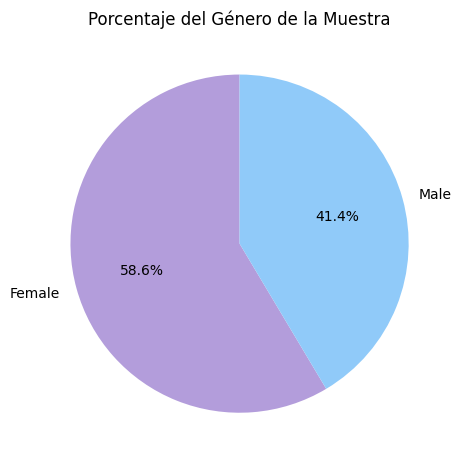

In [107]:
#Gráfico pie chart para visualizar el porcentaje que representa la categoria Hombre y mujer dentro de la muestra
plt.figure(figsize=(12,8))
plt.subplot(1,2,2)

pastel_colors = ['#B39DDB', '#90CAF9']
plt.pie(tabla_gender["Frec. Rel."], labels=tabla_gender["gender"], autopct='%1.1f%%', startangle=90, colors=pastel_colors)
plt.title('Porcentaje del Género de la Muestra')
plt.show()


**Conclusión:** De acuerdo con el gráfico, se evidencia un balance en los datos de la variable género.


2) Location: Está variable permite conocer la ubicación en los estados de las personas estadounidenses que participaron en la muestra.

In [108]:
locacion = df['location'].value_counts()
locacion

,count
location,
Hawaii,2038
Kentucky,2038
Minnesota,2037
Nebraska,2037
New Jersey,2037
Delaware,2036
Arkansas,2036
Massachusetts,2036
Maine,2036


**Conclusión:** La variable "location" presenta una alta variabilidad, ya que los participantes provienen de diversos estados de los Estados Unidos. Esto sugiere que los datos abarcan una amplia distribución geográfica a nivel nacional.

3) smoking_history: Esta variable nos entrega el historial clinico de la muestra.

In [109]:
tabla_smoking = tabla_freq(df['smoking_history']).sort_values('Frec. Abs.', ascending=False)
tabla_smoking

col_0,smoking_history,Frec. Abs.,Frec. Rel.
5,Sin_Información,35800,0.358115
4,Nunca_Fumó,35088,0.350992
1,Ex_Fumador,9352,0.093550
2,Fumador_Actual,9286,0.092890
3,No_Fuma_Actualmente,6439,0.064411
0,Alguna_vez_fumó,4003,0.040043


<ipython-input-110-ce7c8e6d3509>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




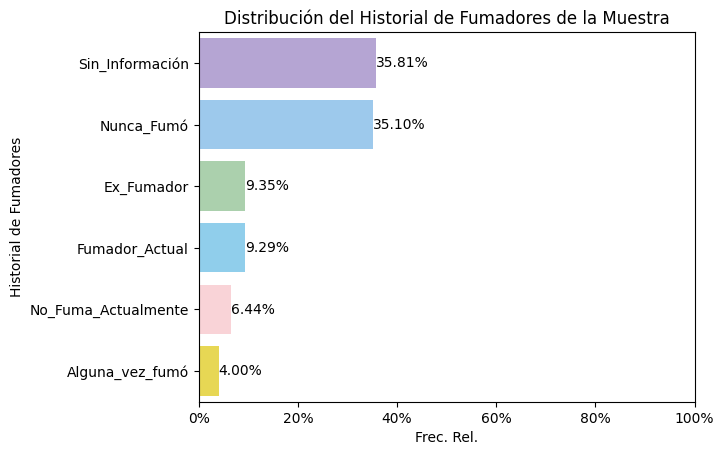

In [110]:
#Gráfica de barras para visualizar la proporción de los datos del historial de fumadores en la muestra
frec_smoking = sns.barplot(
    y=tabla_smoking['smoking_history'],
    x=tabla_smoking["Frec. Rel."] * 100,
    palette=["#B39DDB", "#90CAF9", "#A5D6A7", "#81D4FA", "#FFCDD2", "#FFEB3B"]
)

for container in frec_smoking.containers:
    frec_smoking.bar_label(container, label_type='edge', fmt='%.2f%%')
frec_smoking.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
frec_smoking.set(xlim=(0, 100))
frec_smoking.set_ylabel('Historial de Fumadores')
frec_smoking.set_title('Distribución del Historial de Fumadores de la Muestra')
plt.show()


**Conclusión:** La variable "smoking_history" no está balanceada, ya que hay una gran diferencia en las frecuencias relativas de las categorías. La categoría "Sin Información" y 'Nunca fumó' tienen una proporción muy alta (35%) mientras que categorías como "Alguna vez fumó" representan solo el 4%. Esto podría generar sesgos en el modelo.

4) race: Variable para identificar la raza del participante de la muestra.

In [111]:
tabla_race = tabla_freq(df["race"]).sort_values('Frec. Abs.', ascending=False)
tabla_race

col_0,race,Frec. Abs.,Frec. Rel.
0,AfricanAmerican,20219,0.202255
1,Asian,20005,0.200114
4,Other,19996,0.200024
3,Hispanic,19884,0.198904
2,Caucasian,19864,0.198704


<ipython-input-112-a9a7b530a02f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-112-a9a7b530a02f>:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



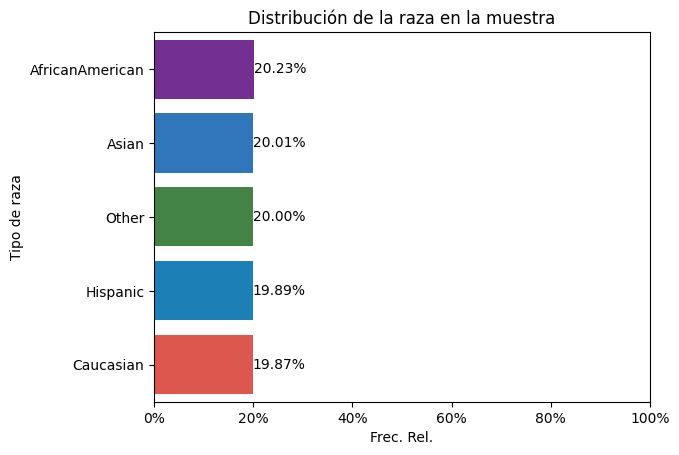

In [112]:
#Gráfica de barras para visualizar la proporción de los datos del historial de fumadores en la muestra
tipo_race = sns.barplot(
    y=tabla_race['race'],
    x=tabla_race["Frec. Rel."] * 100,
    palette = ["#7B1FA2", "#1976D2", "#388E3C", "#0288D1", "#F44336", "#FF9800"]
)

for container in tipo_race.containers:
    tipo_race.bar_label(container, label_type='edge', fmt='%.2f%%')
tipo_race.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
tipo_race.set(xlim=(0, 100))
tipo_race.set_ylabel('Tipo de raza')
tipo_race.set_title('Distribución de la raza en la muestra')
plt.show()

**Conclusión:** La  gráfica de distribución de la raza junto con la tabla de frecuencias muestra que los datos se encuentran equilibrados, indicando que ninguna raza domina el conjunto de datos. Esta distribución reduce el riesgo de que al hacer un modelo favorezca ciertos grupos debido a un desequilibrio en los datos.

5. heart_disease

In [113]:
tabla_heart = tabla_freq(df["heart_disease"])
tabla_heart

col_0,heart_disease,Frec. Abs.,Frec. Rel.
0,0,96026,0.960567
1,1,3942,0.039433


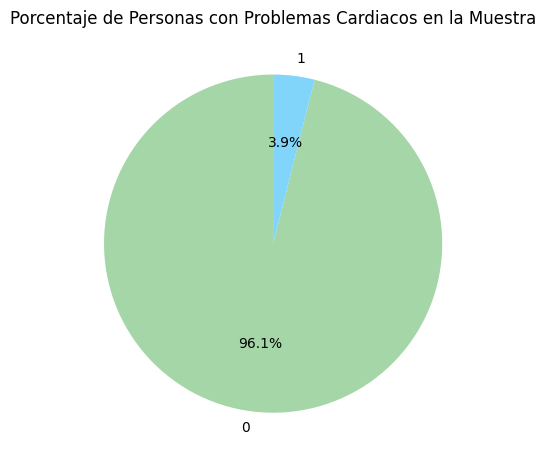

In [114]:
# grafico de torta
plt.figure(figsize=(12,8))
plt.subplot(1,2,2)
pastel_colors = ["#A5D6A7", "#81D4FA"]
plt.pie(tabla_heart["Frec. Rel."], labels=tabla_heart["heart_disease"],autopct='%1.1f%%',startangle=90, colors=pastel_colors)
plt.title('Porcentaje de Personas con Problemas Cardiacos en la Muestra')
plt.show()

*Nota:* 0 -> No presentan problemas cardiacos, 1-> Si presentan problemas cardiacos.

**Conclusión:** Se evidencia una baja variabilidad en los porcentajes de distribución de la muestra en personas con problemas cardiacos. Esta variable podría introducir preferencias a nuestro modelo de clasificación. Por consiguiente, no se tendrá en cuenta para el análisis.

In [134]:
tipo_diabetes = tabla_freq(df["diabetes"])
tipo_diabetes

col_0,diabetes,Frec. Abs.,Frec. Rel.
0,0,91468,0.914973
1,1,8500,0.085027


<ipython-input-140-2f8cf5f57175>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




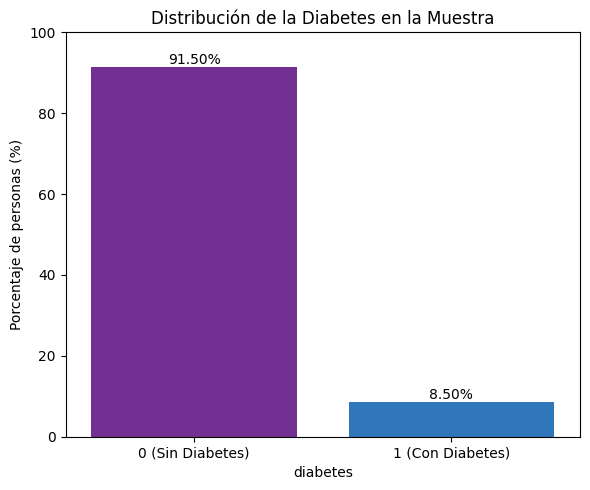

In [140]:
#Gráfica de barras para visualizar la proporción de los datos de diabetes en la muestra
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tipo_diabetes = df['diabetes'].value_counts(normalize=True).reset_index()
tipo_diabetes.columns = ['diabetes', 'Frec. Rel.']

plt.figure(figsize=(6, 5))
tipo_diabetes_plot = sns.barplot(
    x=tipo_diabetes["diabetes"],
    y=tipo_diabetes["Frec. Rel."] * 100,
    palette=["#7B1FA2", "#1976D2"]
)


for container in tipo_diabetes_plot.containers:
    tipo_diabetes_plot.bar_label(container, label_type='edge', fmt='%.2f%%')


plt.xticks([0, 1], ["0 (Sin Diabetes)", "1 (Con Diabetes)"])
tipo_diabetes_plot.set_ylim(0, 100)
tipo_diabetes_plot.set_ylabel('Porcentaje de personas (%)')
tipo_diabetes_plot.set_title('Distribución de la Diabetes en la Muestra')

plt.tight_layout()
plt.show()



*Conclusión:* El gráfico muestra que la clase "Sin Diabetes" tiene una representación significativamente mayor que la clase "Con Diabetes". Este desbalance entre las clases puede generar un sesgo en el modelo, ya que el algoritmo podría inclinarse hacia la clase mayoritaria ("Sin Diabetes") al realizar predicciones.

### **Análisis variable Cuantitativas**

Se procede analizar cada variable de forma individual:


In [115]:
df[['bmi','hbA1c_level', 'blood_glucose_level', 'age']].describe()

,bmi,hbA1c_level,blood_glucose_level,age
count,99968.000000,99968.000000,99968.000000,99968.000000
mean,27.320757,5.527539,138.059269,41.888150
std,6.637318,1.070666,40.710000,22.516775
min,10.010000,3.500000,80.000000,0.080000
25%,23.630000,4.800000,100.000000,24.000000
50%,27.320000,5.800000,140.000000,43.000000
75%,29.580000,6.200000,159.000000,60.000000
max,95.690000,9.000000,300.000000,80.000000


BMI
- El 75% de los datos tienen un IMC menor a 29.58, lo que sugiere que la mayoría no está en obesidad severa, pero sí en sobrepeso.

HbA1c
- El 50% de los datos tienen valores menores a 5.8, lo cual está dentro del rango normal.
- El 75% está por debajo de 6.8, lo que indica que una parte significativa tiene niveles prediabéticos o diabéticos.

blood_glucose_level
- El 50% de los datos están por debajo de 140, que es el umbral para la prediabetes.

Age
Media: 41.88 años
Rango: 0.08 - 80 años
- El 75% tiene menos de 60 años, pero el máximo es 80, lo que sugiere una población envejecida en ciertos casos.

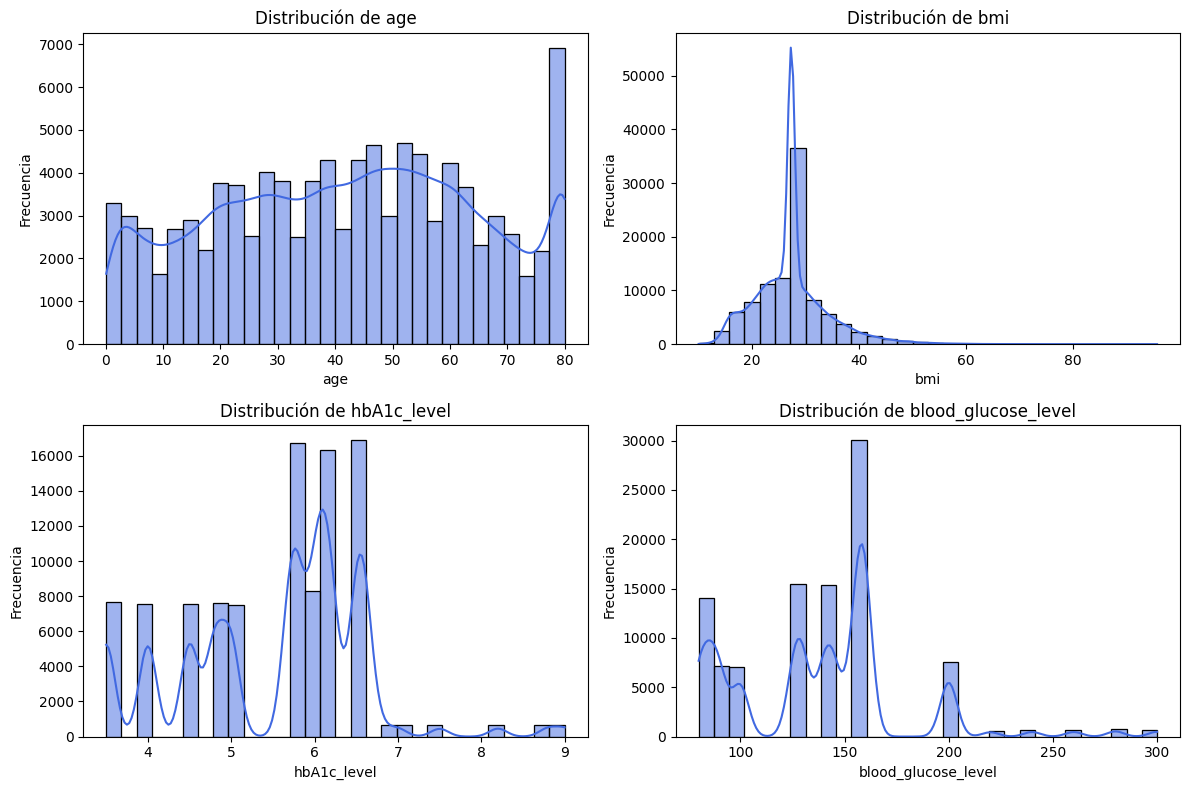

In [60]:
# Seleccionar variables continuas para análisis
continuous_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear histogramas con distribución de densidad (KDE)
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Age: la distribución es relativamente uniforme con ligeras variaciones, se observa un pico notable en el extremo derecho (80 años), lo que indica una mayor concentración de personas en ese rango de edad y no parece seguir una distribución normal, sino que presenta una variabilidad constante con algunos aumentos y disminuciones. El rango de edades es amplio, con un mínimo de 0.08 años, indicando la presencia de bebés en la muestra, y un máximo de 80 años. A simple vista, se puede intuir la necesidad de adaptar estrategias de intervención a diferentes etapas de la vida, desde la infancia hasta la tercera edad.

BMI: La distribución es asimétrica positiva (sesgada a la derecha), se observa un pico muy pronunciado alrededor de 25-30, indicando que la mayoría de las personas tienen un índice de masa corporal en ese rango.Existe una cola larga hacia la derecha, lo que sugiere la presencia de valores atípicos con índices de masa corporal muy elevados.

hbA1c_level: La distribución es multimodal, con varios picos destacados se observa una concentración notable de datos alrededor de los valores 5.6, 6 y 6.5, lo que puede reflejar los valores típicos. También se observan algunos valores extremos dispersos.

blood_glucose_level: la distribución es multimodal, se observan picos pronunciados en valores cercanos a 150, lo que sugiere que esta podría ser una concentración común en los datos,También se observan colas largas hacia la derecha, indicando la presencia de valores atípicos que pueden corresponder a personas con niveles anormalmente elevados de glucosa en sangre.

* **Visualizar outliers**

Se procede a visualizar un Pairplot, con el objetivo de encontrar posibles relaciones entre las variables continuas del conjunto de datos, permitiendo identificar patrones, correlaciones y posibles valores atípicos (outliers)

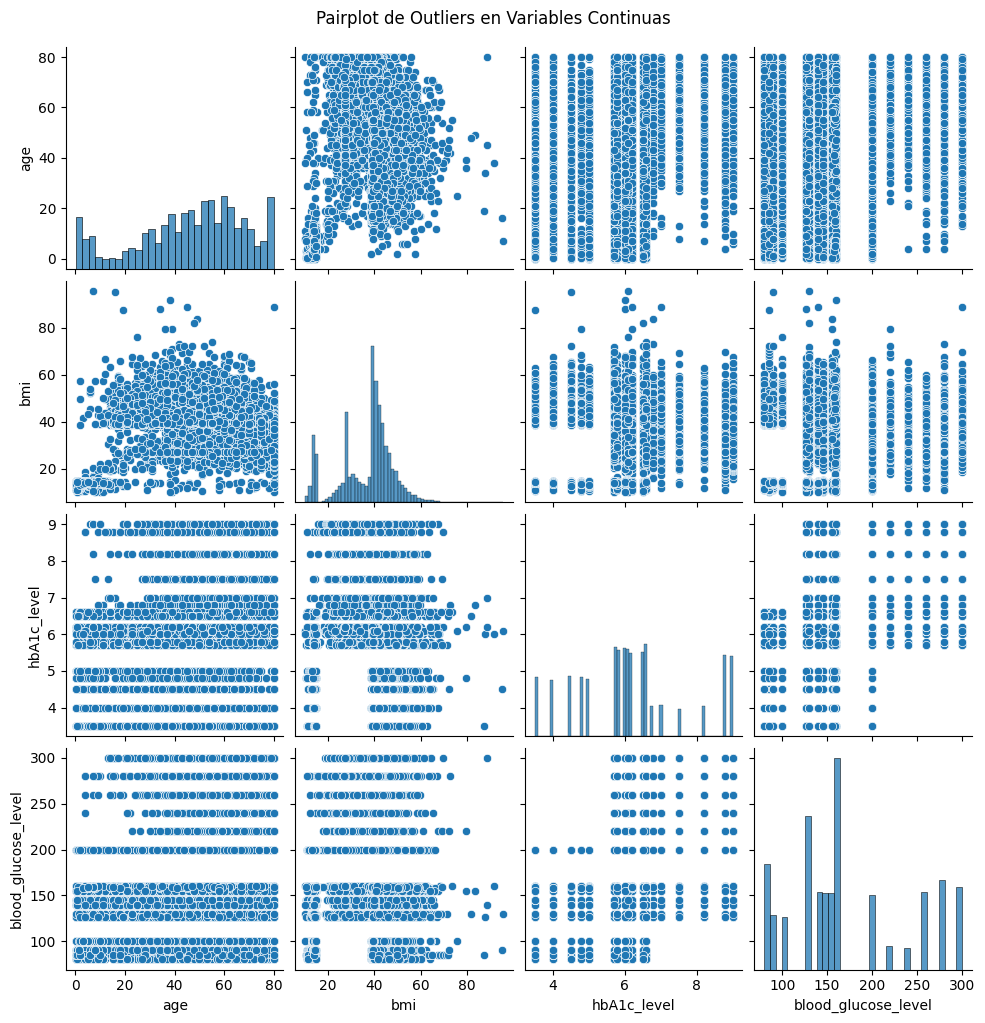

In [ ]:
# Función para identificar outliers usando IQR
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame(index=df.index)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = is_outlier
    return outliers
columns_to_check = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
# Identificar outliers y filtrar datos
outliers = detect_outliers_iqr(df, columns_to_check)
outlier_data = df[outliers.any(axis=1)]
# Generar el pairplot para los outliers
sns.pairplot(outlier_data[columns_to_check])
plt.suptitle("Pairplot de Outliers en Variables Continuas", y=1.02)
plt.show()


* El análisis del pairplot muestra una presencia alta de outliers en variables como *bmi y blood_glucose_level*, con valores extremos indicando errores en los datos.

* *age vs bmi:* No se observa una tendencia clara, lo que indica que el índice de masa corporal no está directamente relacionado con la edad, aunque se detectan algunos outliers en ambos extremos.

* *age vs hbA1c_level y age vs blood_glucose_level:* Ambas relaciones muestran una distribución dispersa y segmentada, sugiriendo que la edad no influye significativamente en estos parámetros, aunque ciertos valores extremos podrían estar asociados a condiciones de salud específicas.

* *bmi vs hbA1c_level y bmi vs blood_glucose_level:*Aunque no se aprecia una relación lineal clara, se identifican concentraciones de datos en ciertos rangos, lo que podría indicar que personas con obesidad o sobrepeso tienden a presentar niveles elevados de glucosa y HbA1c.

# Análisis Bivariado


**- Variables Cualitativas**

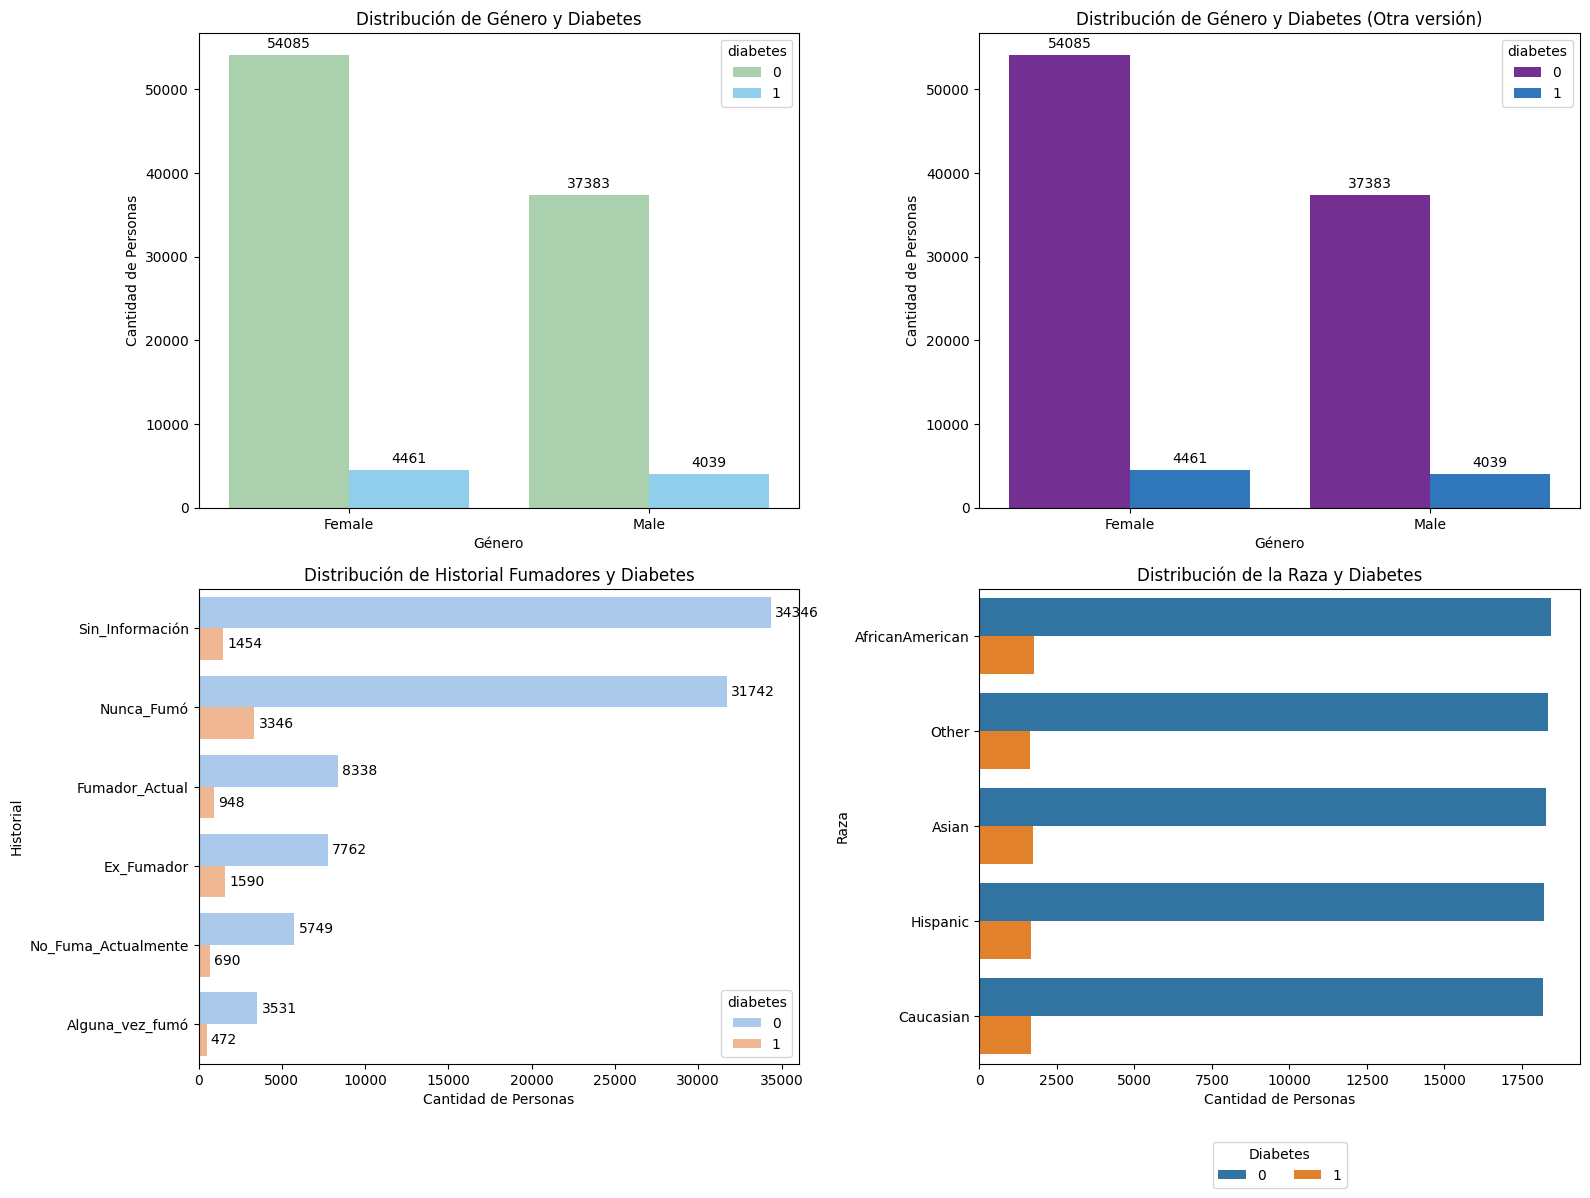

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Distribución de Género y Diabetes
df_counts = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')
sns.barplot(data=df_counts, x='gender', y='count', hue='diabetes', palette=["#A5D6A7", "#81D4FA"], ax=axes[0, 0])
axes[0, 0].set_title("Distribución de Género y Diabetes")
axes[0, 0].set_ylabel('Cantidad de Personas')
axes[0, 0].set_xlabel('Género')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%d', label_type='edge', padding=3)

# Gráfico 2: Distribución de Genero y Diabetes (Otra versión)
df_counts = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')
sns.barplot(data=df_counts, x='gender', y='count', hue='diabetes', palette=["#7B1FA2", "#1976D2"], ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Género y Diabetes (Otra versión)")
axes[0, 1].set_ylabel('Cantidad de Personas')
axes[0, 1].set_xlabel('Género')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', label_type='edge', padding=3)

# Gráfico 3: Distribución de Historial Fumadores y Diabetes
df_counts = df.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count').sort_values('count', ascending=False)
sns.barplot(data=df_counts, y='smoking_history', x='count', hue='diabetes', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title("Distribución de Historial Fumadores y Diabetes")
axes[1, 0].set_xlabel('Cantidad de Personas')
axes[1, 0].set_ylabel('Historial')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', label_type='edge', padding=3)

# Gráfico 4: Distribución de la Raza y Diabetes
df_counts = df.groupby(['race', 'diabetes']).size().reset_index(name='count').sort_values('count', ascending=False)
sns.barplot(data=df_counts, y='race', x='count', hue='diabetes', ax=axes[1, 1])
axes[1, 1].set_title("Distribución de la Raza y Diabetes")
axes[1, 1].set_xlabel('Cantidad de Personas')
axes[1, 1].set_ylabel('Raza')
axes[1, 1].legend(title='Diabetes', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.tight_layout()

plt.show()


Nota: 0=No, 1=Si

**Conclusión análisis Bivariado variables cualitativas:** Según los gráficos presentados, se inferiere que no existe una clara preferencia o sesgo hacia alguna categoría específica. Las distribuciones de las variables en relación con la presencia de diabetes muestran una distribución relativamente equilibrada, por tanto todas las categorías tendrán una representación similar al construir el modelo.

**### Análisis Bivariado cuantitativo**

#### **Verificación de la correlación entre las variables (Pearson, Spearman & Kendall)**

In [79]:
# Variables cuatitativas
cuanti = ["age", "bmi", "hbA1c_level", "blood_glucose_level", "diabetes"]

# Calcular la correlación para Pearson, Spearman y Kendall
correlations = {}
for method in ["pearson", "spearman", "kendall"]:
    correlations[method] = df[cuanti].corr(method=method)["diabetes"]

# Convertir a DataFrame para visualizar mejor
correlation_df = pd.DataFrame(correlations)
print(correlation_df.round(3))

                     pearson  spearman  kendall
age                    0.258     0.262    0.216
bmi                    0.214     0.200    0.168
hbA1c_level            0.401     0.329    0.279
blood_glucose_level    0.420     0.274    0.232
diabetes               1.000     1.000    1.000


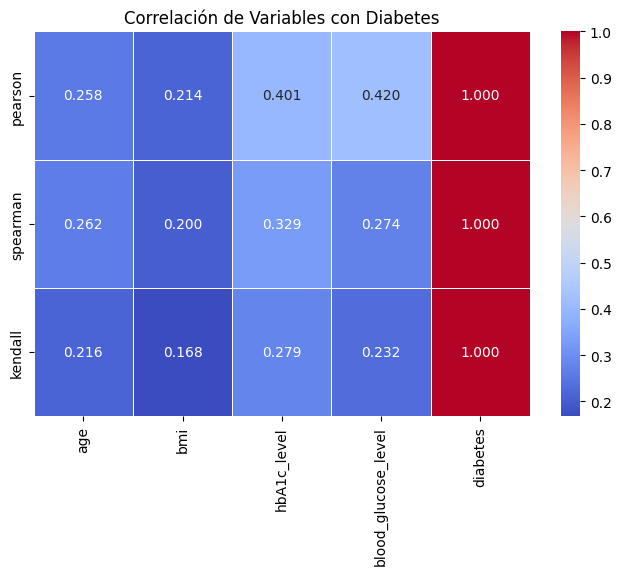

In [80]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_df.T, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".3f")
plt.title("Correlación de Variables con Diabetes")
plt.show()

#### Interpretación de las correlaciones

* La variable que presenta mayor correlación con la diabetes es el nivel de glucosa en sangre (blood_glucose_level), con una correlación de 0.42 en Pearson. por tanto, a mayor nivel de glucosa en sangre, mayor es la probabilidad de tener diabetes.
* El nivel de HbA1c (hbA1c_level) también muestra una fuerte correlación con la diabetes (0.401 en Pearson). Esto tiene sentido, ya que HbA1c mide el promedio de glucosa en sangre en los últimos meses.
* La edad (age) tiene una correlación moderada (0.258 en Pearson), es decir, que las personas mayores tienen mayor probabilidad de tener diabetes, pero la relación no es tan fuerte como los niveles de glucosa y HbA1c.
* El índice de masa corporal (bmi) tiene la correlación más baja (0.214 en Pearson). Aunque el sobrepeso es un factor de riesgo, la relación no es tan fuerte en este conjunto de datos.

#### Conclusión
- Las variables cuantitativas que presentan una mayor correlación con respecto a la diabetes son *blood_glucose_level y hbA1c_level.*
- El bmi tiene una correlación más baja, lo que indica que en este dataset no es un predictor tan fuerte de la diabetes, aunque sigue siendo relevante.

#### **Análisis comparativo de variables continuas según diagnóstico de diabetes**

In [81]:
# Lista de variables a analizar
selected_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

# Crear un DataFrame vacío para almacenar las estadísticas
combined_stats = pd.DataFrame()

# Generar estadísticas descriptivas para cada variable agrupada por diabetes
for var in selected_vars:
    stats = df.groupby("diabetes")[var].describe()
    stats["variable"] = var  # Agregar una columna con el nombre de la variable
    combined_stats = pd.concat([combined_stats, stats])  # Unir las estadísticas

# Reorganizar columnas para mejor presentación
combined_stats = combined_stats.reset_index().set_index(["variable", "diabetes"])

# Mostrar tabla
display(combined_stats)  # Mejor visualización en Jupyter Notebook

count        mean        std     min     25%  \
variable            diabetes                                                   
age                 0         91468.0   40.117075  22.306034    0.08   22.00   
                    1          8500.0   60.946588  14.549880    3.00   52.00   
bmi                 0         91468.0   26.887000   6.373914   10.01   23.24   
                    1          8500.0   31.988382   7.558371   10.98   27.32   
hbA1c_level         0         91468.0    5.396750   0.971586    3.50    4.80   
                    1          8500.0    6.934953   1.076562    5.70    6.10   
blood_glucose_level 0         91468.0  132.851970  34.247292   80.00  100.00   
                    1          8500.0  194.094706  58.641111  126.00  145.00   

                                 50%       75%     max  
variable            diabetes                            
age                 0          40.00   57.0000   80.00  
                    1          62.00   72.0000   80.00  
bmi                 0          27.32   28.8700   95.69  
                    1          29.97   35.9125   88.72  
hbA1c_level         0           5.80    6.2000    6.60  
                    1           6.60    7.5000    9.00  
blood_glucose_level 0         140.00  158.0000  200.00  
                    1         160.00  240.0000  300.00

<ipython-input-82-6dd63d6422a4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




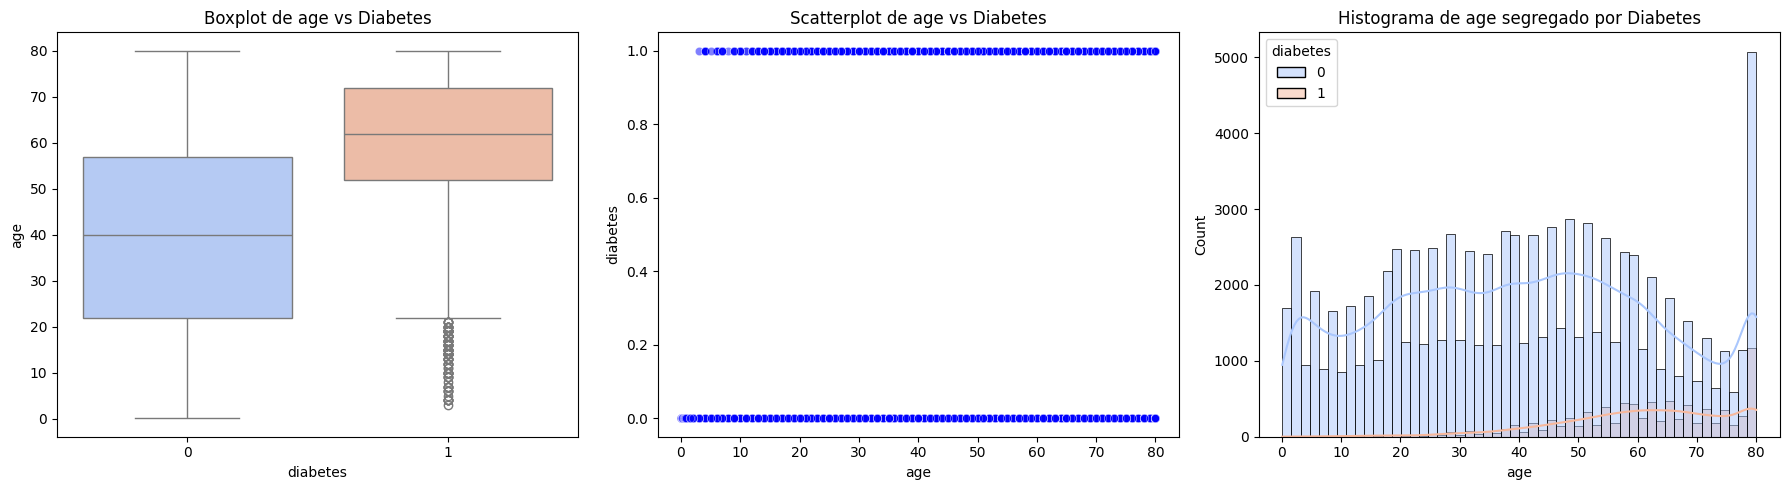

<ipython-input-82-6dd63d6422a4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




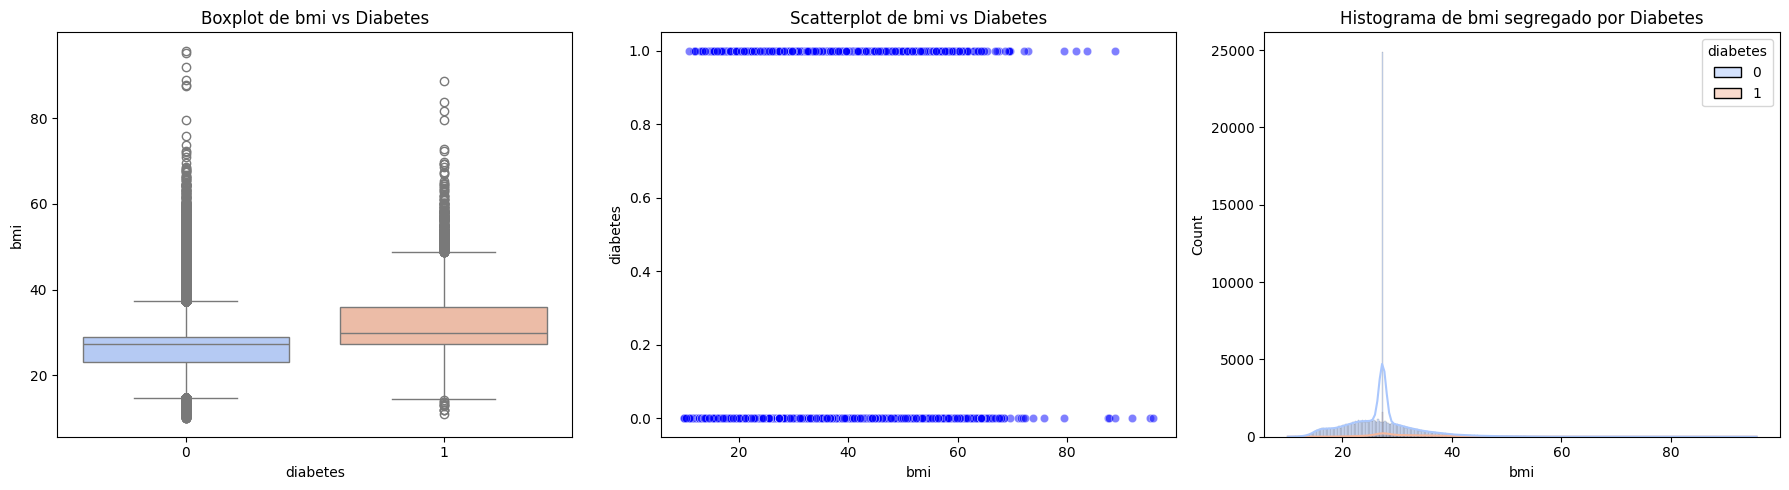

<ipython-input-82-6dd63d6422a4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




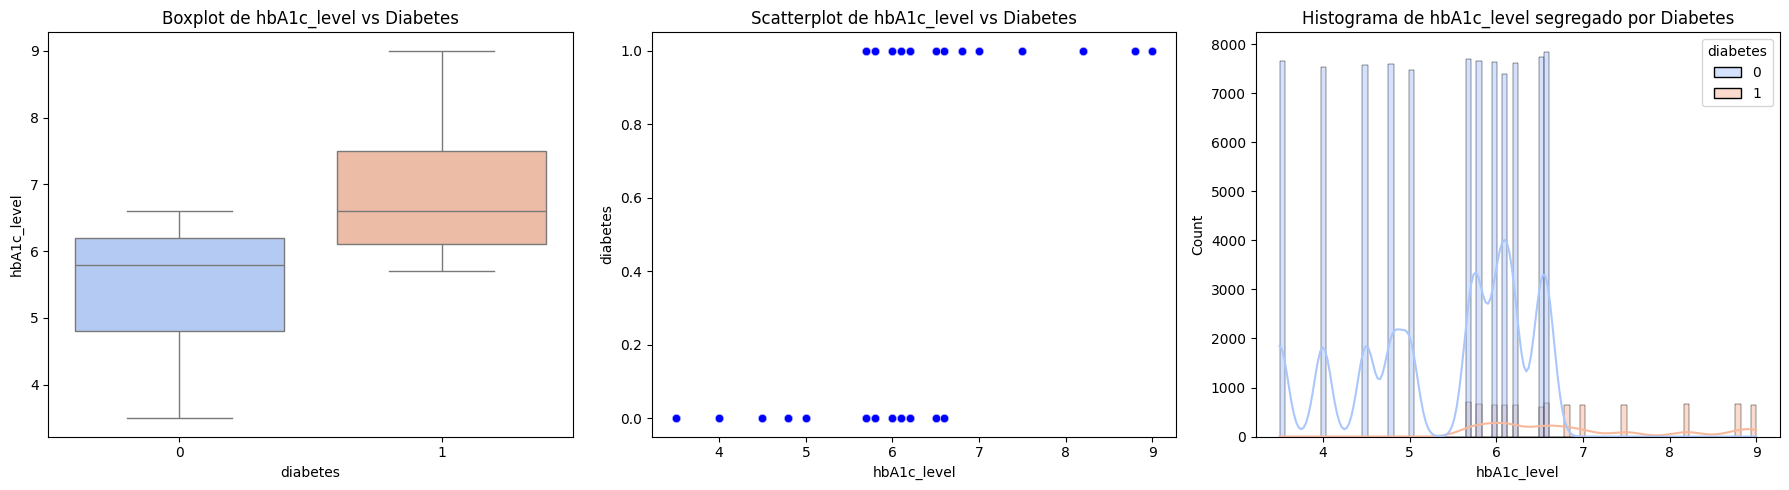

<ipython-input-82-6dd63d6422a4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




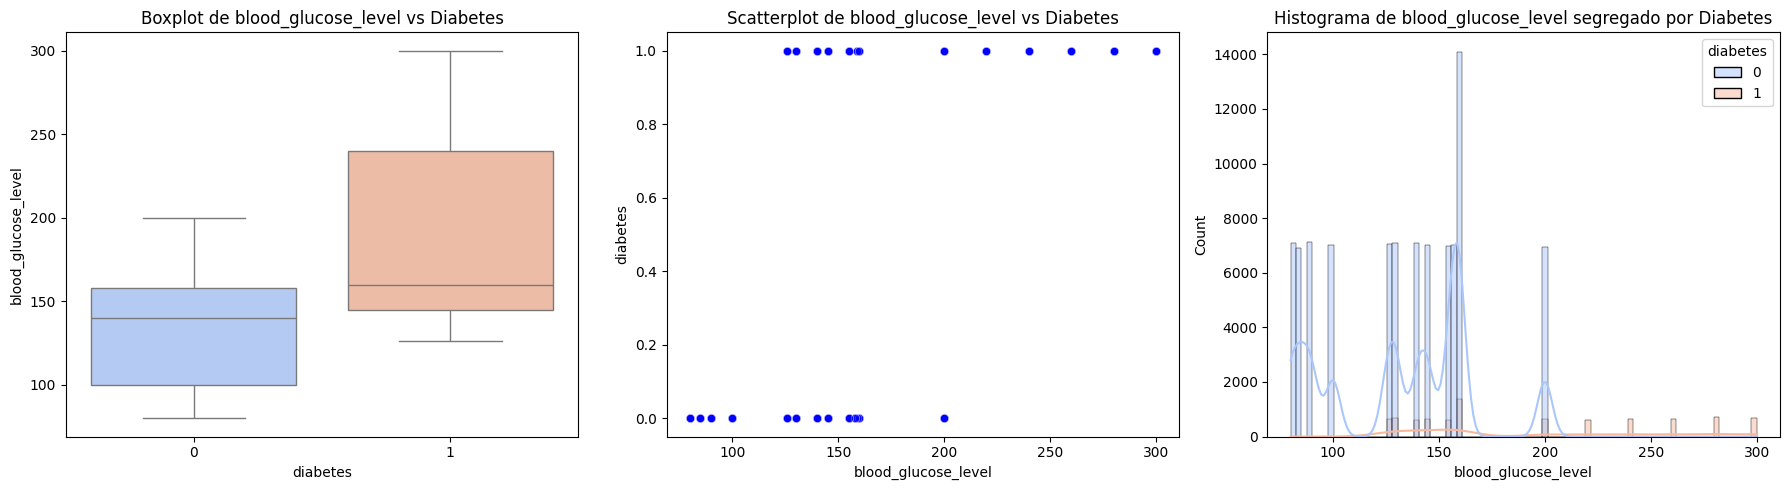

In [82]:
selected_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

for col in selected_vars:
    plt.figure(figsize=(18, 5))

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")
    plt.title(f"Boxplot de {col} vs Diabetes")

    # Scatterplot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=df[col], y=df["diabetes"].astype(float), alpha=0.5, color="blue")
    plt.title(f"Scatterplot de {col} vs Diabetes")

    # Histograma
    plt.subplot(1, 3, 3)
    sns.histplot(data=df, x=col, hue="diabetes", kde=True, palette="coolwarm", alpha=0.5)
    plt.title(f"Histograma de {col} segregado por Diabetes")

    plt.tight_layout()
    plt.show()

**Conclusión**

* *Age:* Personas sin diabetes (0) La mediana se encuentra alrededor de los 40 años con una distribución amplia que va desde los 0 años hasta 80 años y para las personas con diabetes (1) La mediana está cerca de los 60 años, lo que indica que este grupo está compuesto principalmente por personas de mayor edad. También se observan algunos valores atípicos en edades jóvenes

* *bmi:* Personas sin diabetes (0) La mediana del índice de masa corporal (BMI) está alrededor de 25, con una dispersión moderada y existen varios valores atípicos que alcanzan niveles superiores a 60. las Personas con diabetes (1) La mediana del BMI se encuentra en torno a 30, lo que indica una mayor tendencia al sobrepeso u obesidad en este grupo. También hay una mayor concentración de valores altos en comparación con el grupo sin diabetes. Las personas con diabetes tienden a tener un BMI más alto, lo que sugiere una posible relación entre el sobrepeso/obesidad y la presencia de esta condición.

* ***hbA1c: ***Personas sin diabetes (0) La mediana de los niveles de HbA1c se encuentra cerca de 6, con la mayoría de los valores en un rango de 5 a 7. Personas con diabetes (1) La mediana está cerca de 7, con una mayor dispersión que alcanza valores cercanos a 9. Se observa que las personas con diabetes presentan niveles de HbA1c más altos que aquellas sin la condición.


* *Blood glucose level: *Personas sin diabetes (0) La mediana de glucosa se encuentra alrededor de 140-150, con la mayoría de los valores dentro del rango de 90 a 200 Personas con diabetes (1) La mediana es más alta, cercana a 170-180, y se observa una mayor dispersión, con valores que alcanzan hasta 300, por lo que se observa que las personas con diabetes tienden a tener niveles de glucosa más altos que aquellas sin la condición.

# **Modelo de Regresión**

In [123]:
###Para el modelo llamaremos la base 'df_mod'
columns_to_drop = ['year', 'race', 'heart_disease', 'age', 'hypertension', 'bmi']  # Las que no se usarán
df_mod = df.drop(columns=columns_to_drop)

print(df_mod)


       gender location  race:AfricanAmerican  race:Asian  race:Caucasian  \
0      Female  Alabama                     0           0               0   
1      Female  Alabama                     0           1               0   
2        Male  Alabama                     0           0               0   
3        Male  Alabama                     0           0               1   
4      Female  Alabama                     1           0               0   
...       ...      ...                   ...         ...             ...   
99995  Female  Wyoming                     0           0               0   
99996  Female  Wyoming                     0           1               0   
99997    Male  Wyoming                     0           1               0   
99998  Female  Wyoming                     1           0               0   
99999    Male  Wyoming                     0           0               0   

       race:Hispanic  race:Other      smoking_history  hbA1c_level  \
0                

In [122]:
df_mod.columns


Index(['gender', 'location', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'smoking_history',
       'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Como la variable diabetes es binaria (0 o 1), se trata de un problema de clasificación binaria. Para abordarlo, procedemos a crear un modelo de clasificación de regresión logística.

# Paso 1: Preparación de los datos

Para la preparación de los datos, se procede a codificar las variables categóricas, separar variables dependientes e independientes y dividir el conjunto de datos en entrenamiento y prueba.

* ***1.1. Codificar las variables categóricas y separar el conjunto de datos en variables dependientes (Y) e independientes (X).***

Las variables como gender, location y smoking_history deben ser codificadas a valores numéricos para que el modelo pueda interpretarlas. Así que procedemos de la siguiente manera:

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Codificar variables categóricas
X = df_mod[['gender', 'location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
        'race:Hispanic', 'race:Other', 'smoking_history', 'hbA1c_level', 'blood_glucose_level']]
y = df_mod['diabetes']


label_encoder = LabelEncoder()

X['gender'] = label_encoder.fit_transform(X['gender'])
X['location'] = label_encoder.fit_transform(X['location'])
X['smoking_history'] = label_encoder.fit_transform(X['smoking_history'])

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-126-a6de3d74a5df>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-a6de3d74a5df>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-a6de3d74a5df>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Paso 2: Crear y entrenar el modelo de Regresión Logística

In [127]:
# Modelo de regresión logística
model = LogisticRegression()

# Entrenamiento
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# Paso 3: Evaluación del modelo

Cuando tenemos entrenado el modelo, pasamos a evaluar su rendimiento utilizando el conjunto de datos de prueba.

In [128]:
# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 95.73%
Confusion Matrix:
[[18166    88]
 [  765   975]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18254
           1       0.92      0.56      0.70      1740

    accuracy                           0.96     19994
   macro avg       0.94      0.78      0.84     19994
weighted avg       0.96      0.96      0.95     19994



***Conclusiones***

* 1. ***Accuracy del 95%*** se puede decir que las predicciones realizadas por el
modelo fueron correctas.
* 2. ***Matriz de confusión:***

* Verdadero negativo= El modelo predijo correctamente que no tenían diabetes en 18,166 casos.
* Falso positivo = El modelo predijo incorrectamente que había diabetes en 88 casos en los que en realidad no había diabetes.
* Falso negativo = El modelo predijo incorrectamente que no había diabetes en 765 casos donde sí había diabetes.
* verdadero positivo= El modelo predijo correctamente que sí había diabetes en 975 casos.
* 3. ***Classification Report:***

Clase 0 (No tiene diabetes)

* *Precision: *Del total de predicciones de "no tiene diabetes", el 96% fueron correctas.
* *Recall:* De todas las personas que realmente no tienen diabetes, el modelo identificó correctamente al 100%.
* *F1-Score:*  Indica que el modelo tiene un buen balance entre estos dos parámetros.



Clase 1 (Tiene diabetes)

* Precision: Del total de predicciones de "tiene diabetes", el 92% fueron correctas.
* Recall: De todas las personas que realmente tienen diabetes, el modelo identificó solo el 56%. Este es bajo, por tanto el modelo está perdiendo muchos casos positivos (falsos negativos).
* F1-Score: es relativamente bajo, es decir que el modelo no está siendo tan efectivo para identificar a los pacientes con diabetes.

# Conclusiones del modelo

* El modelo presenta un desempeño alto al identificar correctamente a las personas sin diabetes (precisión, recall y F1 son muy altos para la clase 0), sin embargo, tiene problemas con la clase 1 (con diabetes), pues aunque el accuracy es alto, el modelo tiene dificultades para identificar correctamente a las personas con diabetes, dado que la recall para la clase 1 es solo del 56%. Esto significa que el modelo está perdiendo algunos casos positivos (falsos negativos). Por tanto, hay un desbalance de clases, dado que su rendimiento para la clase minoritaria (con diabetes) no es tan bueno. Esto se da porque cuando se hizo el analisis de las variables, el dataset presentaba a muchas más personas sin diabetes que con diabetes, por lo que esta variable hace que la predicción este desbalanceada.

# Conclusiones generales del ejercicio

Este tipo de ejercicios permite realizar un análisis riguroso del conjunto de datos y su relación con la variable objetivo. Además, el análisis univariado y bivariado ayudo a realizar un adecuado tratamiento en las variables categoricas y cuantitativas, identificando cuáles eran las mejores y que llevaron a que el modelo tuviera una precisión del 95%. Una correcta limpieza y procesamiento de los datos es importante y necesaria para seleccionar las variables significativas en cualquier tipo de ejericio, lo que, en la práctica, permite hacer diagnósticos y predicciones que contribuyen a encontrar soluciones efectivas y acertivas. En próximos estudios, se recomienda análizar a fondo los falsos negativos y falsos positivos para ajustar el modelo y mejorar la precisión de los casos positivos en la diabetes. Así mismo, considerar evaluar la inclusión de variables adicionales o realizar un análisis más profundo de las existentes, como los factores de riesgo asociados, que podrían aumentar la precisión del modelo en la predicción.